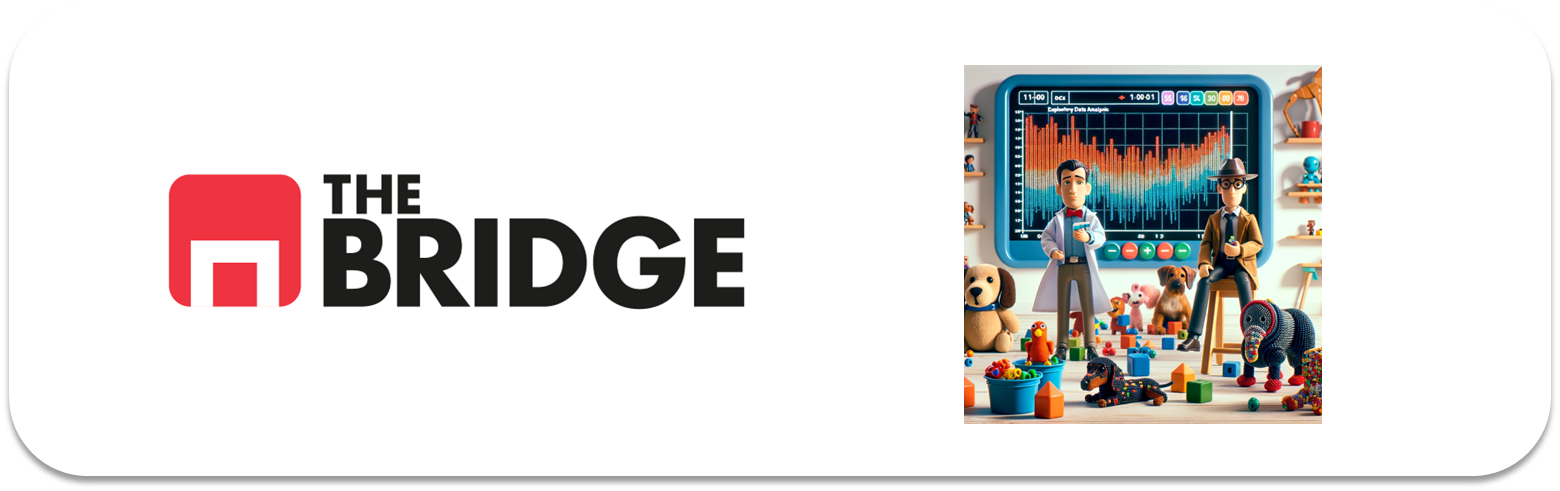

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd



## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [39]:
df_titanic = pd.read_csv("./data/titanic.csv")

df_titanic.head()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [40]:
df_titanic.drop(columns=["deck", "survived", "pclass", "embarked"])

df_titanic.head(5)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [41]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]

df_titanic = df_titanic.drop(columns=["parch", "sibsp"])

df_titanic.head(5)


,survived,pclass,sex,age,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_members
0,0,3,male,22.0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [42]:
moda_embark_town = df_titanic["embark_town"].mode()[0]

df_titanic["embark_town"] = df_titanic["embark_town"].fillna(moda_embark_town)

print(df_titanic["embark_town"].isnull().sum())


0


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [43]:
# Calcular la media general
mean_age = df_titanic["age"].mean()

# Imputar los valores faltantes
df_titanic["age"] = df_titanic["age"].fillna(mean_age)

df_titanic.head(10)

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_members
0,0,3,male,22.000000,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.000000,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.000000,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.000000,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.000000,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
5,0,3,male,29.699118,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,0
6,0,1,male,54.000000,51.8625,S,First,man,True,E,Southampton,no,True,0
7,0,3,male,2.000000,21.0750,S,Third,child,False,NaN,Southampton,no,False,4
8,1,3,female,27.000000,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,2
9,1,2,female,14.000000,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,1


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

In [44]:
# 1- Sexo, edad y supervivencia

# Totales absolutos y relativos
print(df_titanic["who"].value_counts())
print(df_titanic.groupby("who")["alive"].value_counts())
print(df_titanic.groupby("who")["alive"].value_counts(normalize=True))

# Test Chi-cuadrado: sexo vs supervivencia
from scipy.stats import chi2_contingency

tabla_sexo = pd.crosstab(df_titanic["sex"], df_titanic["alive"])
chi2, p, _, _ = chi2_contingency(tabla_sexo)
print(f"p-valor (sexo vs supervivencia): {p}")



who
man      537
woman    271
child     83
Name: count, dtype: int64
who    alive
child  yes       49
       no        34
man    no       449
       yes       88
woman  yes      205
       no        66
Name: count, dtype: int64
who    alive
child  yes      0.590361
       no       0.409639
man    no       0.836127
       yes      0.163873
woman  yes      0.756458
       no       0.243542
Name: proportion, dtype: float64
p-valor (sexo vs supervivencia): 1.1973570627755645e-58


En términos absolutos y relativos sobrevivieron mas mujeres que niños y hombres.

Segun el valor de Chi cuadrado, rechazamos la hipótesis nula, la supervivencia sí tiene correlación con el sexo de la persona. 

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?


In [45]:
# 2- Clase y supervivencia

print(df_titanic["class"].value_counts())
print(df_titanic.groupby("class")["alive"].value_counts())
print(df_titanic.groupby("class")["alive"].value_counts(normalize=True))

tabla_clase = pd.crosstab(df_titanic["class"], df_titanic["alive"])
chi2, p, _, _ = chi2_contingency(tabla_clase)
print(f"p-valor (clase vs supervivencia): {p}")


class
Third     491
First     216
Second    184
Name: count, dtype: int64
class   alive
First   yes      136
        no        80
Second  no        97
        yes       87
Third   no       372
        yes      119
Name: count, dtype: int64
class   alive
First   yes      0.629630
        no       0.370370
Second  no       0.527174
        yes      0.472826
Third   no       0.757637
        yes      0.242363
Name: proportion, dtype: float64
p-valor (clase vs supervivencia): 4.549251711298793e-23


En términos absolutos y relativos, sobrevivieron mas personas que iban en Primera clase.

Segun el p-valor, rechazamos la hipotesis nula: Sí existe correlación entre la clase y la supervivencia.


3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?


In [46]:
# 3- Ciudad de embarque y supervivencia

print(df_titanic["embark_town"].value_counts())
print(df_titanic.groupby("embark_town")["alive"].value_counts())
print(df_titanic.groupby("embark_town")["alive"].value_counts(normalize=True))

tabla_ciudad = pd.crosstab(df_titanic["embark_town"], df_titanic["alive"])
chi2, p, _, _ = chi2_contingency(tabla_ciudad)
print(f"p-valor (ciudad vs supervivencia): {p}")


embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64
embark_town  alive
Cherbourg    yes       93
             no        75
Queenstown   no        47
             yes       30
Southampton  no       427
             yes      219
Name: count, dtype: int64
embark_town  alive
Cherbourg    yes      0.553571
             no       0.446429
Queenstown   no       0.610390
             yes      0.389610
Southampton  no       0.660991
             yes      0.339009
Name: proportion, dtype: float64
p-valor (ciudad vs supervivencia): 2.3008626481449577e-06


En términos absolutos sobrevivieron mas personas que embarcaron en Southampton, pero en términos relativos, sobrevivieron mas personas de las que embarcaron en Cherbourg.

Según el p-valor, rechjazamos la hipótesis nula: sí existe correlación entre la ciudad de embarque y la supervivencia. 

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?


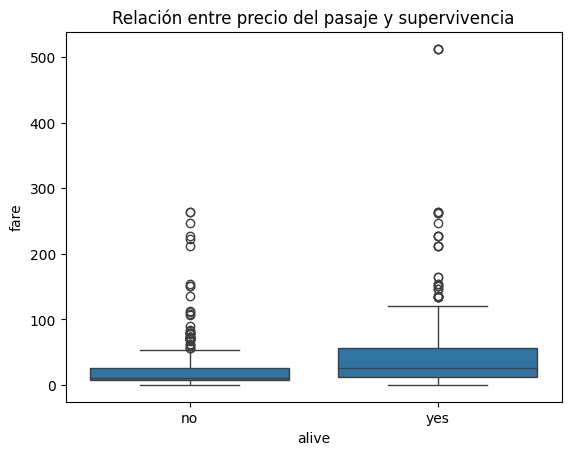

In [47]:
# 4- Precio del pasaje vs supervivencia

sns.boxplot(x="alive", y="fare", data=df_titanic)
plt.title("Relación entre precio del pasaje y supervivencia")
plt.show()



5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?



In [48]:
# 5- Pasajeros que no pagaron / el que mas pagó

# Pasajeros con pasaje gratuito
print(df_titanic[df_titanic["fare"] == 0][["fare", "alive", "who", "class"]])

# El que más pagó
print(df_titanic.sort_values("fare", ascending=False).head(1))


     fare alive  who   class
179   0.0    no  man   Third
263   0.0    no  man   First
271   0.0   yes  man   Third
277   0.0    no  man  Second
302   0.0    no  man   Third
413   0.0    no  man  Second
466   0.0    no  man  Second
481   0.0    no  man  Second
597   0.0    no  man   Third
633   0.0    no  man   First
674   0.0    no  man  Second
732   0.0    no  man  Second
806   0.0    no  man   First
815   0.0    no  man   First
822   0.0    no  man   First
     survived  pclass   sex   age      fare embarked  class  who  adult_male  \
679         1       1  male  36.0  512.3292        C  First  man        True   

    deck embark_town alive  alone  family_members  
679    B   Cherbourg   yes  False               1  


6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.


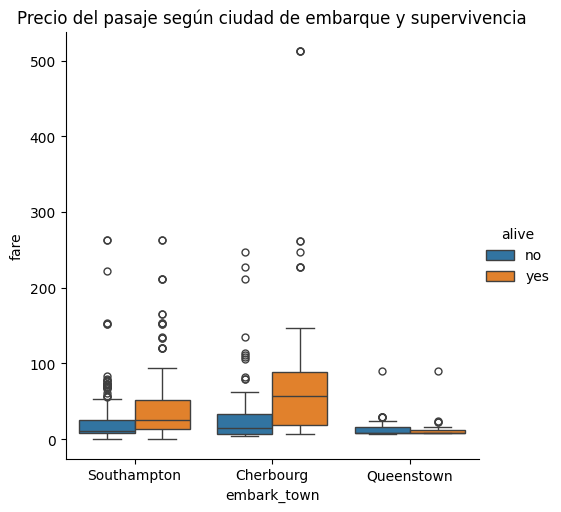

In [49]:
# 6- Dinero + ciudad de embarque vs supervivencia

sns.catplot(data=df_titanic, x="embark_town", y="fare", hue="alive", kind="box")
plt.title("Precio del pasaje según ciudad de embarque y supervivencia")
plt.show()


pareciera ser que la gente que sobrevivio en mayor proporción fueron aquellos que embarcaron en Cherbourg y que su fare estaba entre los 25 y 100


7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?


alive          no  yes
class  who            
First  child    1    5
       man     77   42
       woman    2   89
Second child    0   19
       man     91    8
       woman    6   60
Third  child   33   25
       man    281   38
       woman   58   56


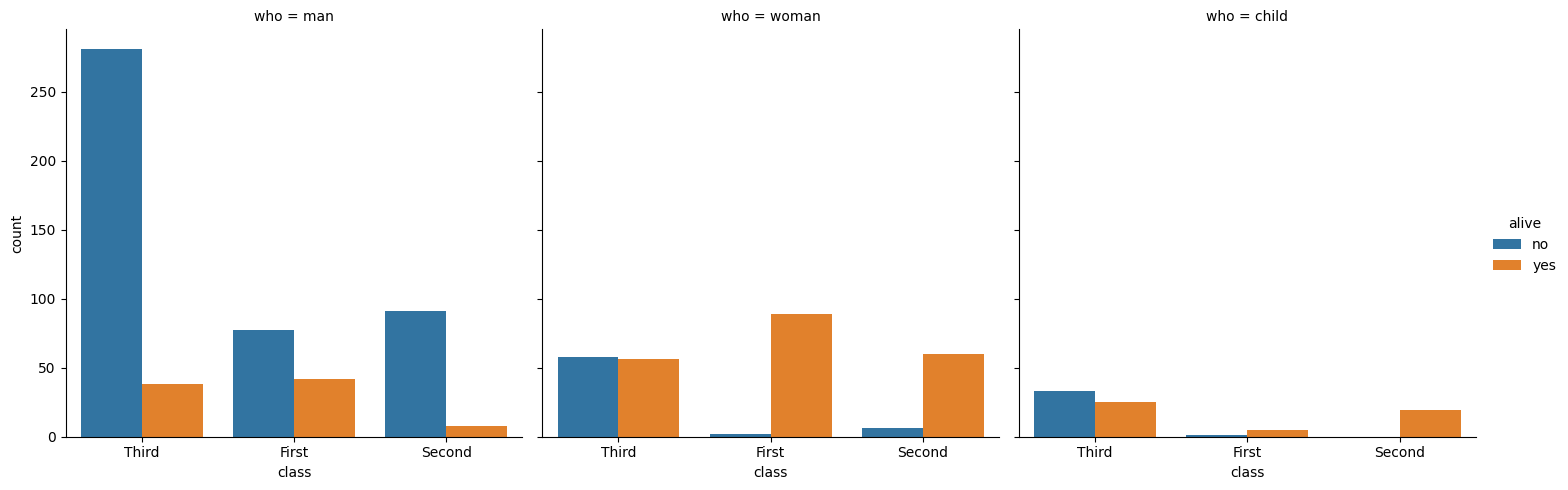

In [50]:
# 7- Clase + edad(who) vs supervivencia

# Tabla de contingencia
print(pd.crosstab([df_titanic["class"], df_titanic["who"]], df_titanic["alive"]))

# Visualización
sns.catplot(data=df_titanic, x="class", hue="alive", col="who", kind="count")
plt.show()



En términos de clase y edad sobrevivieron mas mujeres que iban en primera clase. 


8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

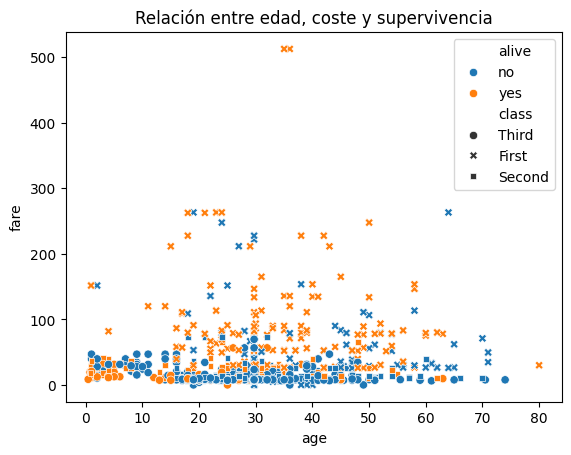

In [51]:
# 8- Edad + precio + clase vs supervivencia

sns.scatterplot(data=df_titanic, x="age", y="fare", hue="alive", style="class")
plt.title("Relación entre edad, coste y supervivencia")
plt.show()


## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

aircompany
TabarAir      142
MoldaviAir    133
PamPangea     117
FlyQ          108
Airnar        100
Name: count, dtype: int64


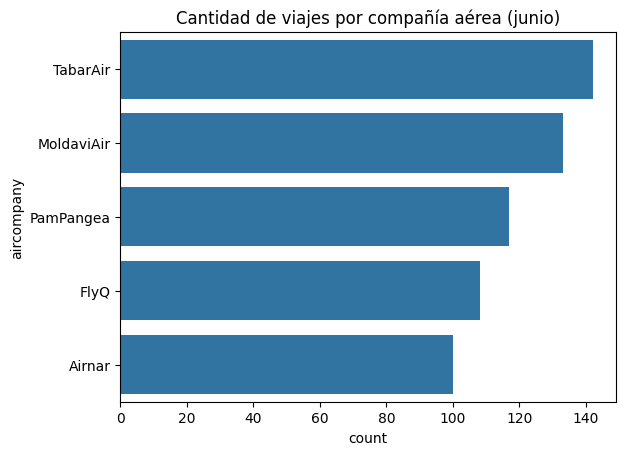

In [52]:



df_junio = pd.read_csv("./data/dataset_viajes_jun.csv")  

df_junio.head()

print(df_junio["aircompany"].value_counts())

# Gráfico de número de viajes por compañía
sns.countplot(data=df_junio, y="aircompany", order=df_junio["aircompany"].value_counts().index)
plt.title("Cantidad de viajes por compañía aérea (junio)")
plt.show()



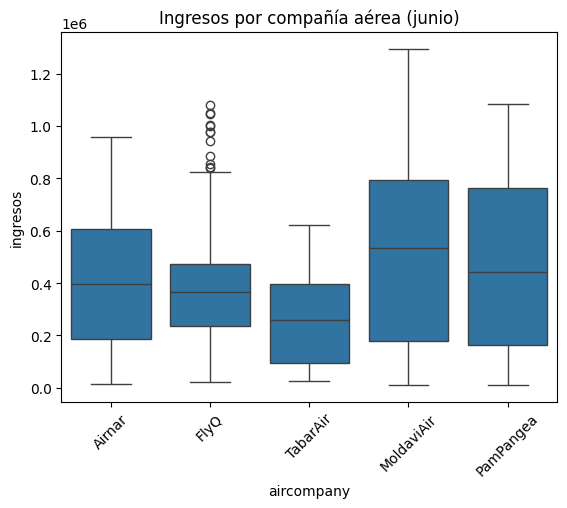

aircompany
MoldaviAir    548077.209098
PamPangea     478417.048718
Airnar        405293.978200
FlyQ          401619.008056
TabarAir      271042.230282
Name: ingresos, dtype: float64


In [53]:
sns.boxplot(data=df_junio, x="aircompany", y="ingresos")
plt.xticks(rotation=45)
plt.title("Ingresos por compañía aérea (junio)")
plt.show()

print(df_junio.groupby("aircompany")["ingresos"].mean().sort_values(ascending=False))


TabarAir genera menos ingresos por viaje, o tiene más volumen pero menos rentabilidad, o lo contrario: menos vuelos pero muy rentables.

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

In [54]:
df_junio.columns

Index(['aircompany', 'origen', 'destino', 'distancia', 'avion', 'con_escala',
       'consumo_kg', 'duracion', 'ingresos', 'id_vuelo', 'mes'],
      dtype='object')

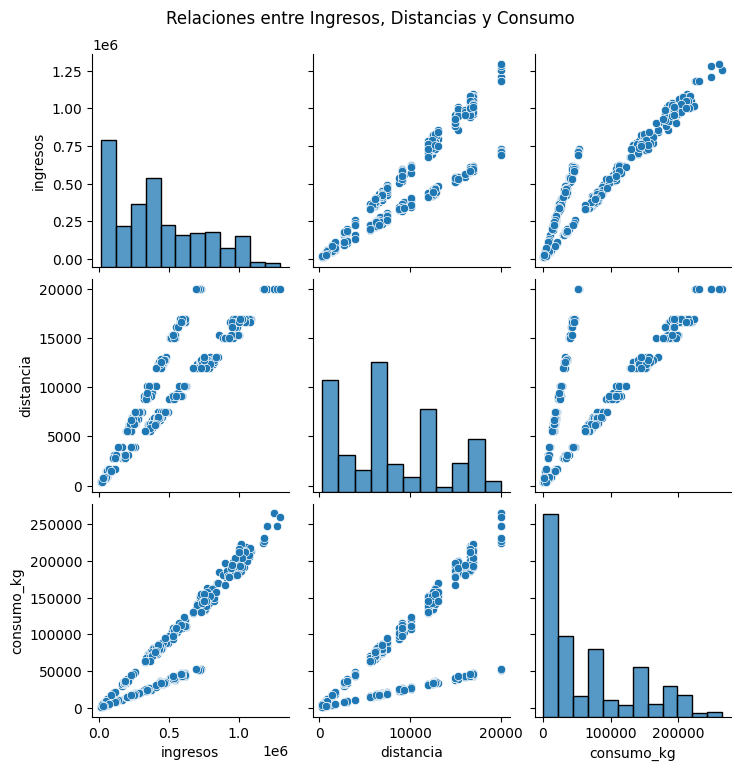

In [55]:
sns.pairplot(df_junio[["ingresos", "distancia", "consumo_kg"]])
plt.suptitle("Relaciones entre Ingresos, Distancias y Consumo", y=1.02)
plt.show()

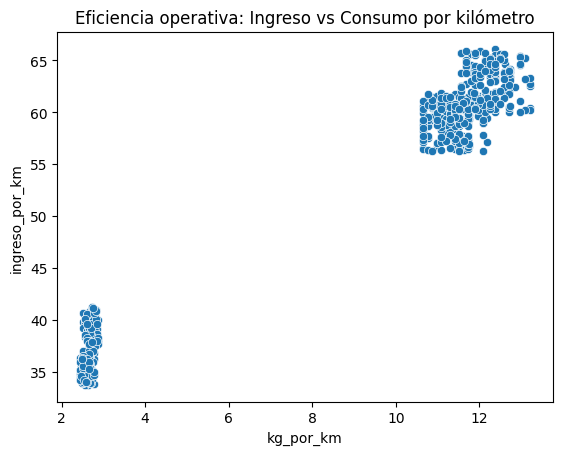

In [56]:
# Crear indicadores
df_junio["ingreso_por_km"] = df_junio["ingresos"] / df_junio["distancia"]
df_junio["kg_por_km"] = df_junio["consumo_kg"] / df_junio["distancia"]

# Visualizar eficiencia operativa
sns.scatterplot(data=df_junio, x="kg_por_km", y="ingreso_por_km")
plt.title("Eficiencia operativa: Ingreso vs Consumo por kilómetro")
plt.show()



### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

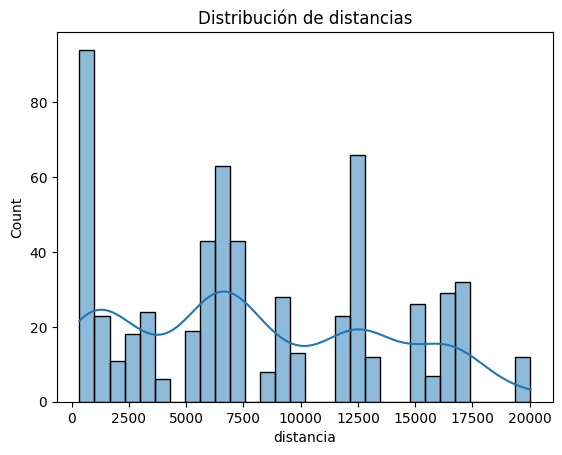

In [57]:

sns.histplot(df_junio["distancia"], bins=30, kde=True)
plt.title("Distribución de distancias")
plt.show()


In [58]:
df_junio["cat_vuelo"] = pd.cut(
    df_junio["distancia"],
    bins=[0, 500, 1500, 3000, df_junio["distancia"].max()],
    labels=["Corto", "Medio", "Largo", "Muy largo"]
)


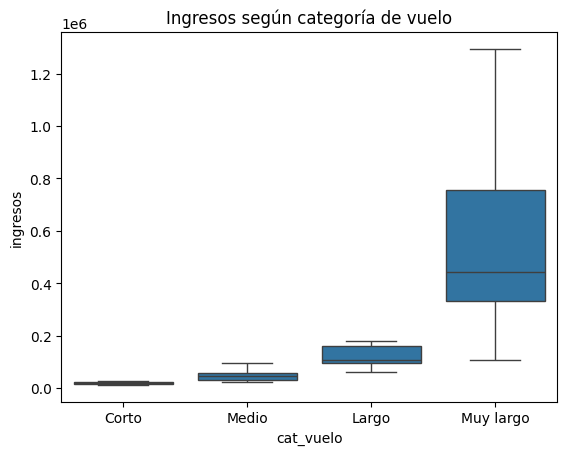

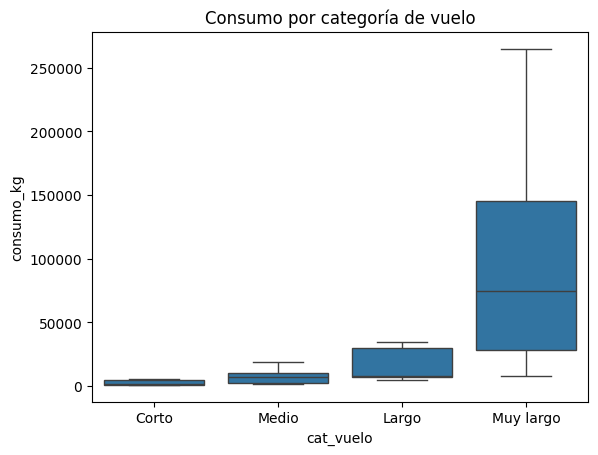

                ingresos    consumo_kg
cat_vuelo                             
Corto       18376.133125   2571.422119
Medio       47518.077412   7035.306495
Largo      116393.791724  16417.884190
Muy largo  535812.374670  87638.561902


/var/folders/cr/8xj_2x0s5qsfclc5g6dp39d00000gn/T/ipykernel_62484/3130840041.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_junio.groupby("cat_vuelo")[["ingresos", "consumo_kg"]].mean())


In [59]:
# Boxplot: Ingresos por categoría de vuelo
sns.boxplot(x="cat_vuelo", y="ingresos", data=df_junio)
plt.title("Ingresos según categoría de vuelo")
plt.show()

# Boxplot: Consumo por categoría de vuelo
sns.boxplot(x="cat_vuelo", y="consumo_kg", data=df_junio)
plt.title("Consumo por categoría de vuelo")
plt.show()

# Ingresos y consumo promedio por categoría
print(df_junio.groupby("cat_vuelo")[["ingresos", "consumo_kg"]].mean())


### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.